In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sympy import symbols
from sympy.logic.boolalg import to_dnf

In [2]:
folder = os.path.join("examples", "functions_xor2")

In [7]:
def read_file(file_name, convert_to_syms = True): # convert_to_syms: converts a string presenting a function to a symbolic expression using the sympy library

    f = open(file_name)
    final_func = None

    data = {}
    for l in f:
        if l.startswith("-1"):
            final_func = l.strip().split(";")[1]
            continue

        s = l.strip().split(";")
        t = float(s[0].split("=")[1])
        data[t] = {}
        for func in s[1:]:
            if func:
                func,n = func.split(":")
                try:
                    func = func.strip().split("=")[1]
                except:
                    func = "None"

                if convert_to_syms:
                    ins = func.replace("|", "").replace("&","").replace("~","").replace("(","").replace(")","").split()
                    syms = symbols(ins)
                    for i, sym in zip(ins,syms):
                        globals()[i] = sym

                    func = to_dnf(func, True)

                n = int(n)
                data[t][func] = n
    if convert_to_syms:
        final_func = to_dnf(final_func, True)

    T = list(data.keys())
    N = sum(data[T[0]].values())

    final_sol = sorted(zip(data[t].values(), data[t].keys()))
    best_sol = final_sol[0][1]

    if not final_func:
        final_func = best_sol

    counts = []
    for t,functions in data.items():
        if final_func in functions:
            counts.append(functions[final_func]/N)
        else:
            counts.append(0)   
    f.close()
    return(N, T, counts, final_func)

In [8]:
#file_name = os.path.join("examples", "functions_XOR3_100.txt")
file_names = os.listdir(folder)

In [9]:
Cs = []

for file_name in file_names:
    N, T, counts, final_func = read_file(os.path.join(folder,file_name))
    Cs.append(counts)
    
Cs = np.array(Cs)

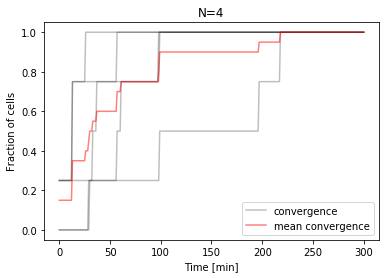

In [10]:
for i,counts in enumerate(Cs):
    if not i:
        plt.plot(T, counts, color="black", alpha = 0.25, label='convergence')
    else:
        plt.plot(T, counts, color="black", alpha = 0.25, label='_no_legend')
    #plt.xticks(np.arange(0,len(T),100), T[::100])

mean_Cs = np.mean(Cs, axis=0)
plt.plot(T, mean_Cs, color="red", alpha = 0.5, label='mean convergence')
plt.legend()
plt.xlabel("Time [min]")
plt.ylabel("Fraction of cells")
plt.title(f"N={N}")
plt.show()